### Imports

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
matplotlib.rcParams.update({'font.size': 16, "legend.frameon": False})

### Leitura de dados

In [2]:
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")

E = (dataset.DEATH_EVENT == 1)
T = dataset.time
group1 = (dataset.diabetes == 1)
label1 = "Diabetes +"
group2 = (dataset.diabetes == 0)
label2 = "Diabetes -"

### Analises

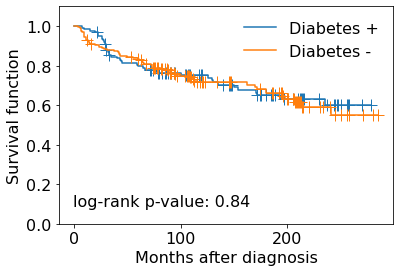

In [3]:
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")

E = (dataset.DEATH_EVENT == 1)
T = dataset.time
group1 = (dataset.diabetes == 1)
label1 = "Diabetes +"
group2 = (dataset.diabetes == 0)
label2 = "Diabetes -"

def km_and_logrank(group1, group2, T, E, label1, label2):
    """
    group1: booleans identificando o grupo 1
    group2: booleans identificando o grupo 2
    T: pd.Series identificando o tempo da análise de sobrevivência
    E: pd.Series identificando o evento (censurado ou evento) da análise de sobrevivência
    label1: nome do grupo 1
    label2: nome do grupo 2
    """
    T1=T[group1]
    E1=E[group1]
    
    T2=T[group2]
    E2=E[group2]

    #logrank_test
    results=logrank_test(T1,T2,event_observed_A=E1, event_observed_B=E2)
    
    #Kaplan Meier plot
    kmf = KaplanMeierFitter()

    ax = plt.subplot(111)
    ax = kmf.fit(T1, E1, label=f"{label1}").plot(ax=ax, ci_show=False, show_censors=True)
    ax = kmf.fit(T2, E2, label=f"{label2}").plot(ax=ax, ci_show=False, show_censors=True)
    ax.set_xlabel('Months after diagnosis')
    ax.set_ylabel('Survival function')
    plt.ylim([0, 1.1])
    anchored_text = AnchoredText("log-rank p-value: {:.3}".format(results.p_value), loc=3, frameon=False)
    ax.add_artist(anchored_text)
    
km_and_logrank(group1, group2, T, E, label1, label2)